In [6]:
using Revise, ReachabilityAnalysis

In [7]:
using Plots

In [8]:
X0 = rand(Hyperrectangle)

Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}}([-1.6987796643476143, 0.037292369608803236], [0.574070399013942, 1.0934461677015324])

In [11]:
T = overapproximate(TaylorModelReachSet, X0)

LoadError: MethodError: no method matching overapproximate(::Type{TaylorModelReachSet}, ::Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}})
Closest candidates are:
  overapproximate(!Matched::EmptySet, ::Any...) at /home/mforets/.julia/dev/LazySets/src/Approximations/overapproximate.jl:241
  overapproximate(!Matched::ReachabilityAnalysis.AbstractLazyReachSet, ::Any) at /home/mforets/.julia/dev/ReachabilityAnalysis/src/Flowpipes/reachsets.jl:292
  overapproximate(!Matched::Flowpipe, ::Any...) at /home/mforets/.julia/dev/ReachabilityAnalysis/src/Flowpipes/flowpipes.jl:609
  ...

In [10]:
T = overapproximate(T, Hyperrectangle) |> set # returns a ReachSet

LoadError: UndefVarError: T not defined

In [ ]:
isequivalent(X0, T)

In [ ]:
Z0 = rand(Zonotope, num_generators=2, dim=2)
T = convert(TaylorModelReachSet, Z0)
T = overapproximate(T, Zonotope) # returns a ReachSet
isequivalent(Z0, T.X)

In [ ]:
Z0.generators

In [ ]:
Matrix(T.X.generators)

In [ ]:
Z0.center

In [ ]:
T.X.center

In [ ]:
Z0 = rand(Zonotope, num_generators=4, dim=2)
T = convert(TaylorModelReachSet, Z0)
T = overapproximate(T, Zonotope) # returns a ReachSet
isequivalent(Z0, T.X)

In [ ]:
Matrix(T.X.generators)

In [ ]:
Matrix(Z0.generators)

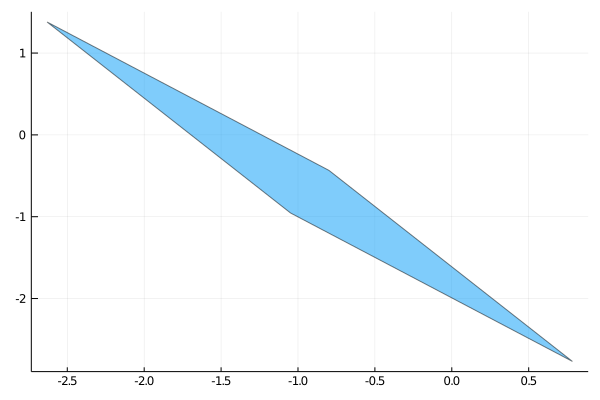

In [12]:
Z = rand(Zonotope, num_generators=2, dim=2)

plot(Z)

In [14]:
const RA = ReachabilityAnalysis

ReachabilityAnalysis

In [23]:
using TaylorModels

In [24]:
function _overapproximate(Z::AbstractZonotope{N}, ::Type{<:TaylorModelReachSet};
                          orderQ::Integer=2, orderT::Integer=8, Δt::RA.TimeInterval=RA.zeroI,
                          indices=1:dim(Z)) where {N}

    n = dim(Z)
    x = set_variables("x", numvars=n, order=2*orderQ)

    if order(Z) > 1
        # indices selects the indices that we want to keep
        Z = LazySets.Approximations._overapproximate_hparallelotope(Z, indices)

        # diagonal generators matrix
        # Z = _reduce_order(Z, 1)
    end
    c = LazySets.center(Z)
    G = genmat(Z)

    # preallocations
    vTM = Vector{TaylorModel1{TaylorN{N}, N}}(undef, n)

    # for each variable i = 1, .., n, compute the linear polynomial that covers
    # the line segment corresponding to the i-th edge of X
    @inbounds for i in 1:n
        pi = c[i] + sum(view(G, i, :) .* x)
        vTM[i] = TaylorModel1(Taylor1(pi, orderT), RA.zeroI, RA.zeroI, Δt)
    end

    return TaylorModelReachSet(vTM, Δt)
end

_overapproximate (generic function with 1 method)

In [26]:
T = _overapproximate(Z, TaylorModelReachSet)

TaylorModelReachSet{Float64}(TaylorModel1{TaylorN{Float64},Float64}[  - 0.92350745550128 - 0.9163944056549396 x₁ + 0.7914893550919045 x₂ + [0, 0],   - 0.6944993235010295 + 0.9069462193111496 x₁ - 1.1672764080228202 x₂ + [0, 0]], [0, 0])

In [27]:
set(T)

2-element Array{TaylorModel1{TaylorN{Float64},Float64},1}:
     - 0.92350745550128 - 0.9163944056549396 x₁ + 0.7914893550919045 x₂ + [0, 0]
   - 0.6944993235010295 + 0.9069462193111496 x₁ - 1.1672764080228202 x₂ + [0, 0]

In [28]:
genmat(Z)

2×2 Array{Float64,2}:
 -0.916394   0.791489
  0.906946  -1.16728

In [30]:
using LazySets: center

center(Z)

2-element Array{Float64,1}:
 -0.92350745550128
 -0.6944993235010295

In [31]:
Z = rand(Zonotope, num_generators=4, dim=2)
genmat(Z)

2×4 Array{Float64,2}:
 0.335158  -0.456498  -0.799468   0.141424
 0.181925  -0.568434  -1.4265    -0.0640547

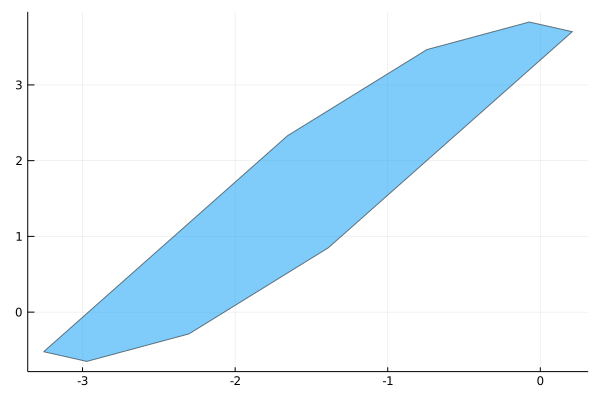

In [35]:
plot(Z)

In [48]:
H12 = LazySets.Approximations._overapproximate_hparallelotope(Z, 1:2)
H34 = LazySets.Approximations._overapproximate_hparallelotope(Z, 3:4)
H13 = LazySets.Approximations._overapproximate_hparallelotope(Z, [1,3])

Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([-1.5228466035939172, 1.5899953962230131], [0.7882360405335139 -1.1711664729223261; 0.4278566997466156 -2.0897219728172853])

In [44]:
genmat(H)

2×2 Array{Float64,2}:
 -1.29513   0.437415
 -2.31092  -0.198116

In [46]:
genmat(Z)

2×4 Array{Float64,2}:
 0.335158  -0.456498  -0.799468   0.141424
 0.181925  -0.568434  -1.4265    -0.0640547

In [50]:
area(H12)

7.506575200749708

In [51]:
area(H34)

5.069667987311153

In [52]:
area(H13)

4.5844110068437995

In [62]:
T13 = _overapproximate(H13, TaylorModelReachSet)

TaylorModelReachSet{Float64}(TaylorModel1{TaylorN{Float64},Float64}[  - 1.5228466035939172 + 0.7882360405335139 x₁ - 1.1711664729223261 x₂ + [0, 0],   1.5899953962230131 + 0.4278566997466156 x₁ - 2.0897219728172853 x₂ + [0, 0]], [0, 0])

In [63]:
xTM = set(T13)

2-element Array{TaylorModel1{TaylorN{Float64},Float64},1}:
   - 1.5228466035939172 + 0.7882360405335139 x₁ - 1.1711664729223261 x₂ + [0, 0]
     1.5899953962230131 + 0.4278566997466156 x₁ - 2.0897219728172853 x₂ + [0, 0]

In [68]:
xTM[1]

  - 1.5228466035939172 + 0.7882360405335139 x₁ - 1.1711664729223261 x₂ + [0, 0]

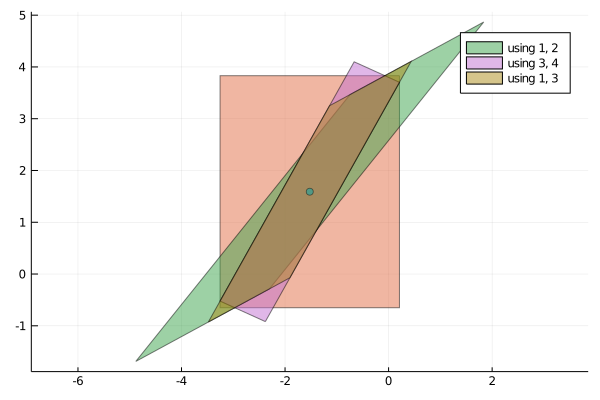

In [61]:
plot(Z)
plot!(box_approximation(Z))
plot!(H12, lab="using 1, 2", ratio=1.)
plot!(H34, lab="using 3, 4", ratio=1.)
plot!(H13, lab="using 1, 3", ratio=1.)

plot!(Singleton(center(H13)))

## Idea: pass to a parallelotope

So we have a `Z0` that is of order 1 but not a diagonal.

In [ ]:
P = overapproximate(Z0, HParallelotope)
genmat(P)

In [ ]:
plot(Z0, lab="Z0")
plot!(P, lab="P")
plot!(T.X, lab="T.X")

In [ ]:
L = LazySets.Approximations._overapproximate_hparallelotope(Z0, [1, 4])

plot(Z0, lab="Z0")
plot!(L, lab="L")

In [ ]:
L

In [ ]:
plot(Z0, lab="Z0")
plot!(P, lab="P")

In [ ]:
genmat(L)

In [ ]:
genmat(P)

---

## Reachability

In [ ]:
const RA = ReachabilityAnalysis

H = Hyperrectangle(low=[0.7, 2.1], high=[0.9, 2.3])
R = RA._init(H)

In [ ]:
using TaylorModels

In [ ]:
?TaylorModelN

In [ ]:
typeof(R.X[1])

In [ ]:
Z = rand(Zonotope,num_generators=10,dim=2)
R = RA._init(Z)
R.X[1]

In [ ]:
typeof(R.X[2])

In [ ]:
@taylorize function rotating!(du, u, p, t)
    du[1] = u[2]
    du[2] = -u[1]
end

prob = @ivp(x' = rotating!(x), dim:2, x(0) ∈ Hyperrectangle(low=[0.7, 2.1], high=[0.9, 2.3]))
solve(prob, tspan=(0.0, 1.0))

In [ ]:
ReachabilityAnalysis._convert_or_overapproximate

In [ ]:
@taylorize function rotating!(du, u, p, t)
    du[1] = u[2]
    du[2] = -u[1]
end

prob = @ivp(x' = rotating!(x), dim:2, x(0) ∈ Hyperrectangle(low=[0.7, 2.1], high=[0.9, 2.3]))
solve(prob, tspan=(0.0, 1.0))

In [ ]:
p1=[3,1//1]; p2=[1,3//1]; p3=[4,4//1]; p4=[6,5//1];
line14=Line2D(p1,p4); line23=Line2D(p2,p3);
intersection(line14, line23)

In [ ]:
line14

In [ ]:
line23

In [ ]:
intersection(line14, line23) # (false, Point2([0.0, 0.0]))